In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
toyata = pd.read_csv("/content/ToyotaCorolla.csv", encoding= 'unicode_escape')
toyata.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# As per problem statement taking few features to consider to predict price

In [4]:
toyota = toyata[['Price','Age_08_04',"KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


no need to change column data types and no missing values as well.

In [6]:
#renaming column names for our convinence
toyota = toyota.rename(columns={"Age_08_04":"Age"})
toyota.head(2)

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


all features are numerical type only so, no need to convert any columns as well.

In [7]:
toyota.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


#univariate analysis

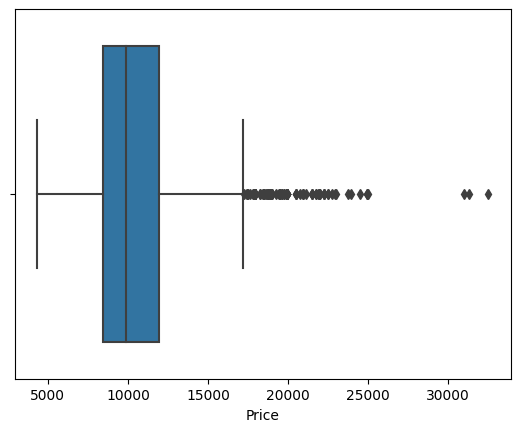

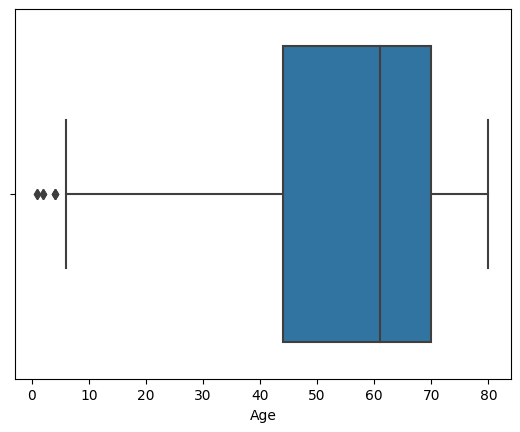

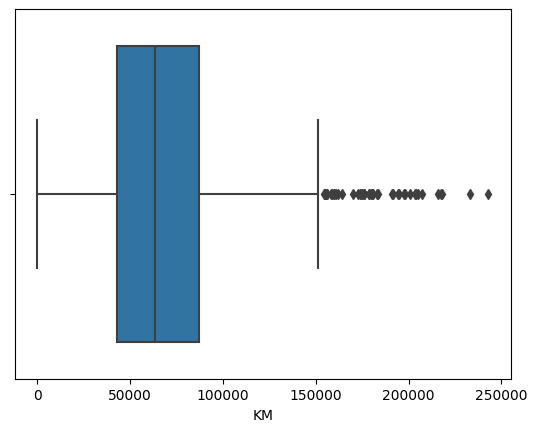

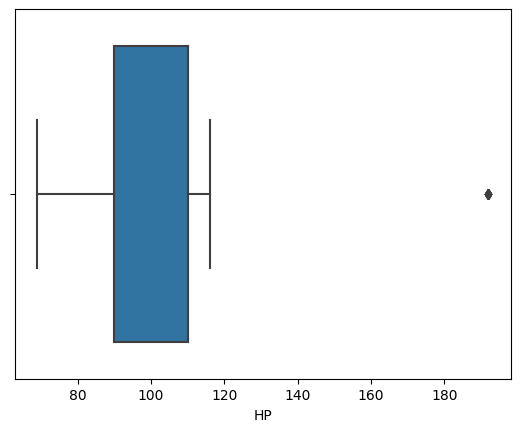

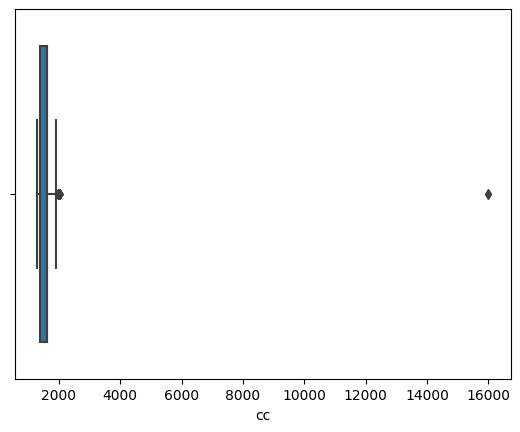

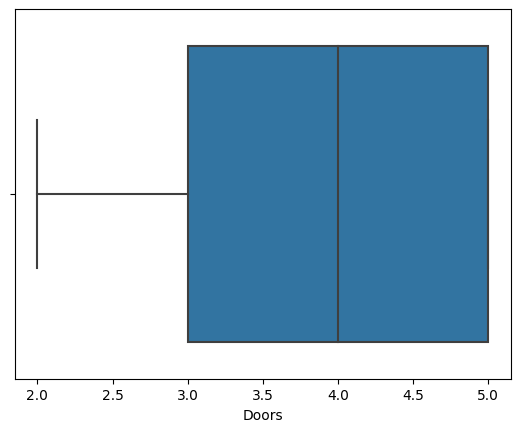

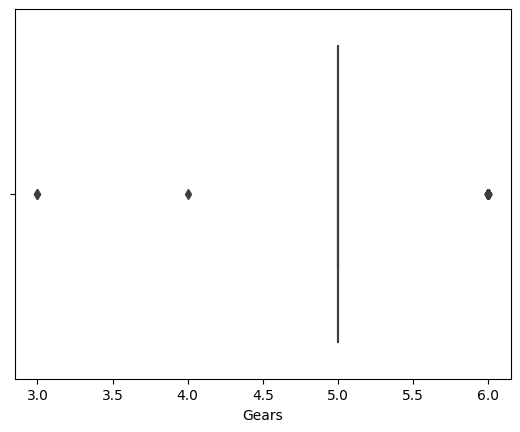

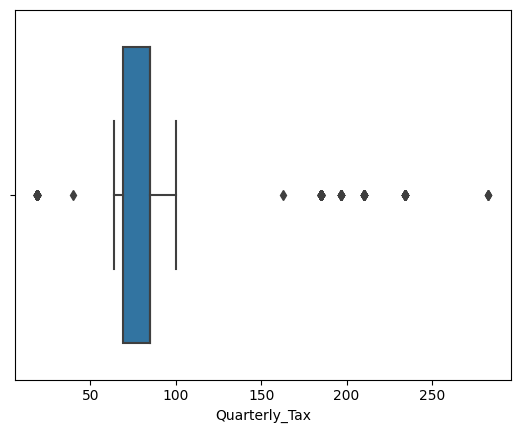

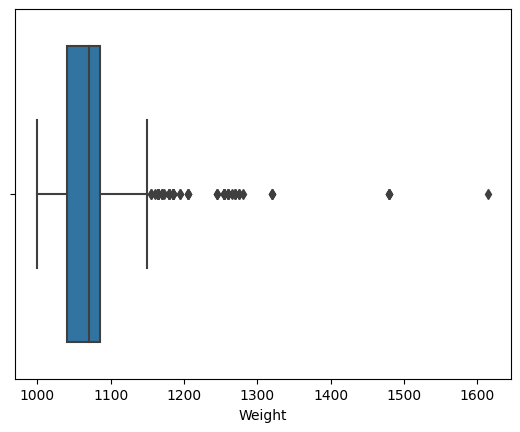

In [8]:
# plotting boxplot
for i in toyota.columns:
  if toyota[i].dtype == "float64" or toyota[i].dtype == "int64":
    sns.boxplot(x=i, data=toyota)
    plt.show()

all independent features are having outliers for bas model lets have outliers as it is

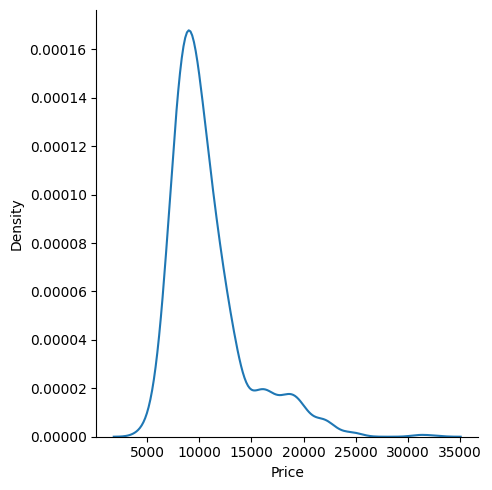

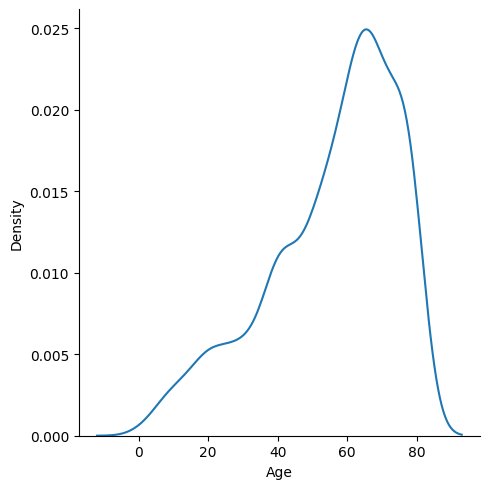

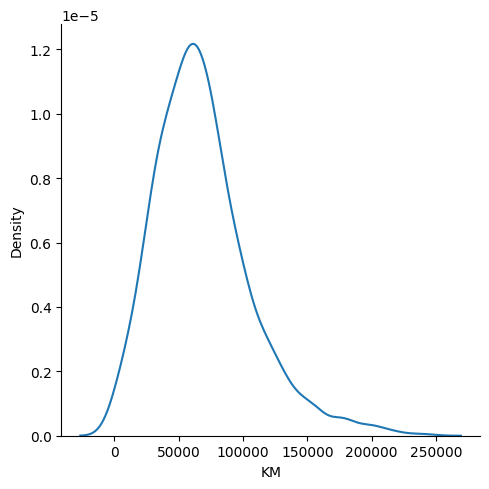

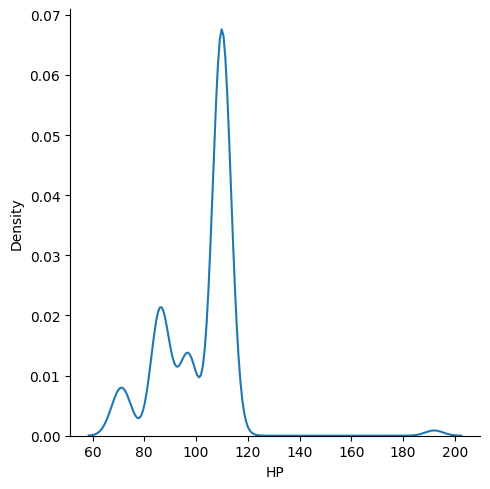

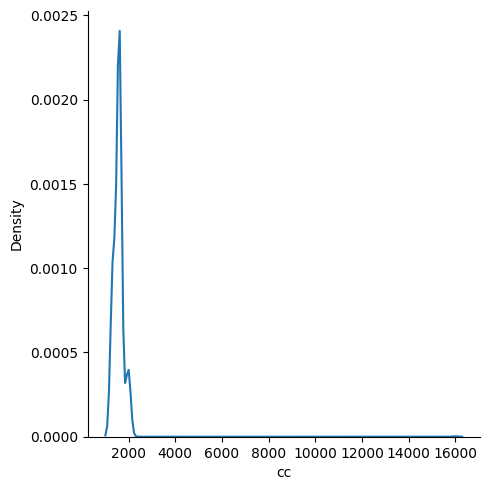

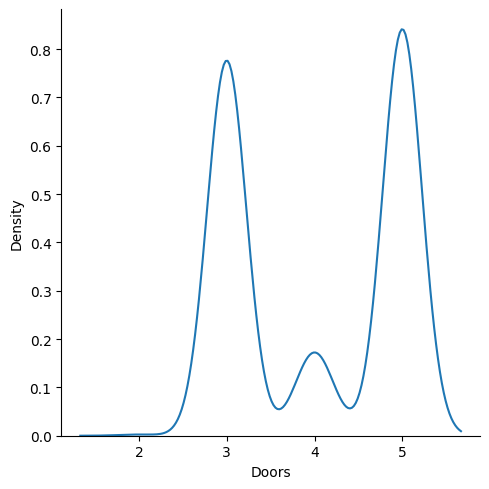

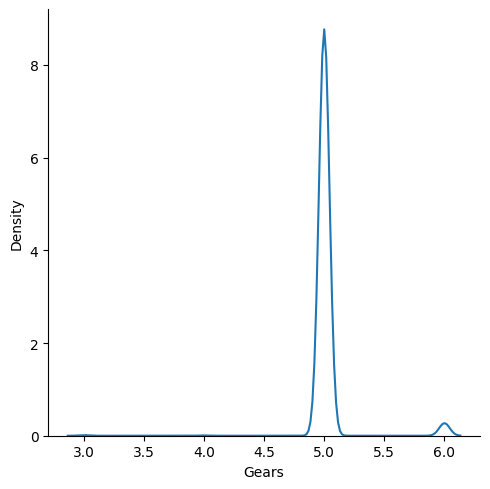

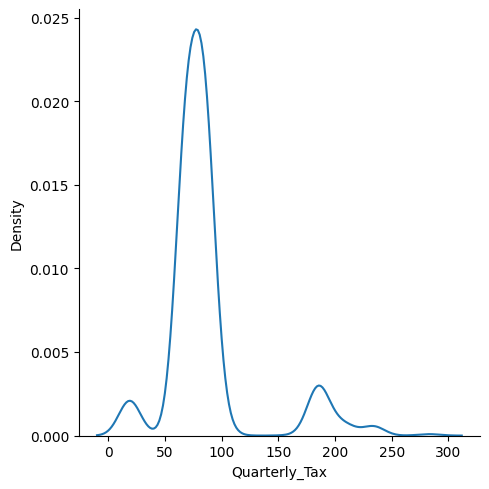

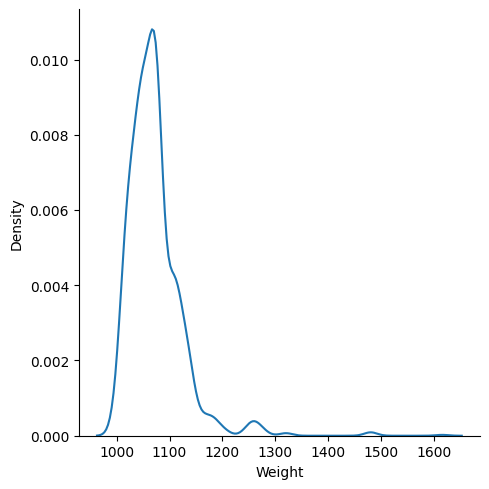

In [9]:
for i in toyota.columns:
  if toyota[i].dtype == "int64" or toyota[i].dtype == "float64":
    sns.displot(toyota[i],kind='kde')
    plt.show()

#Bivariate Plots

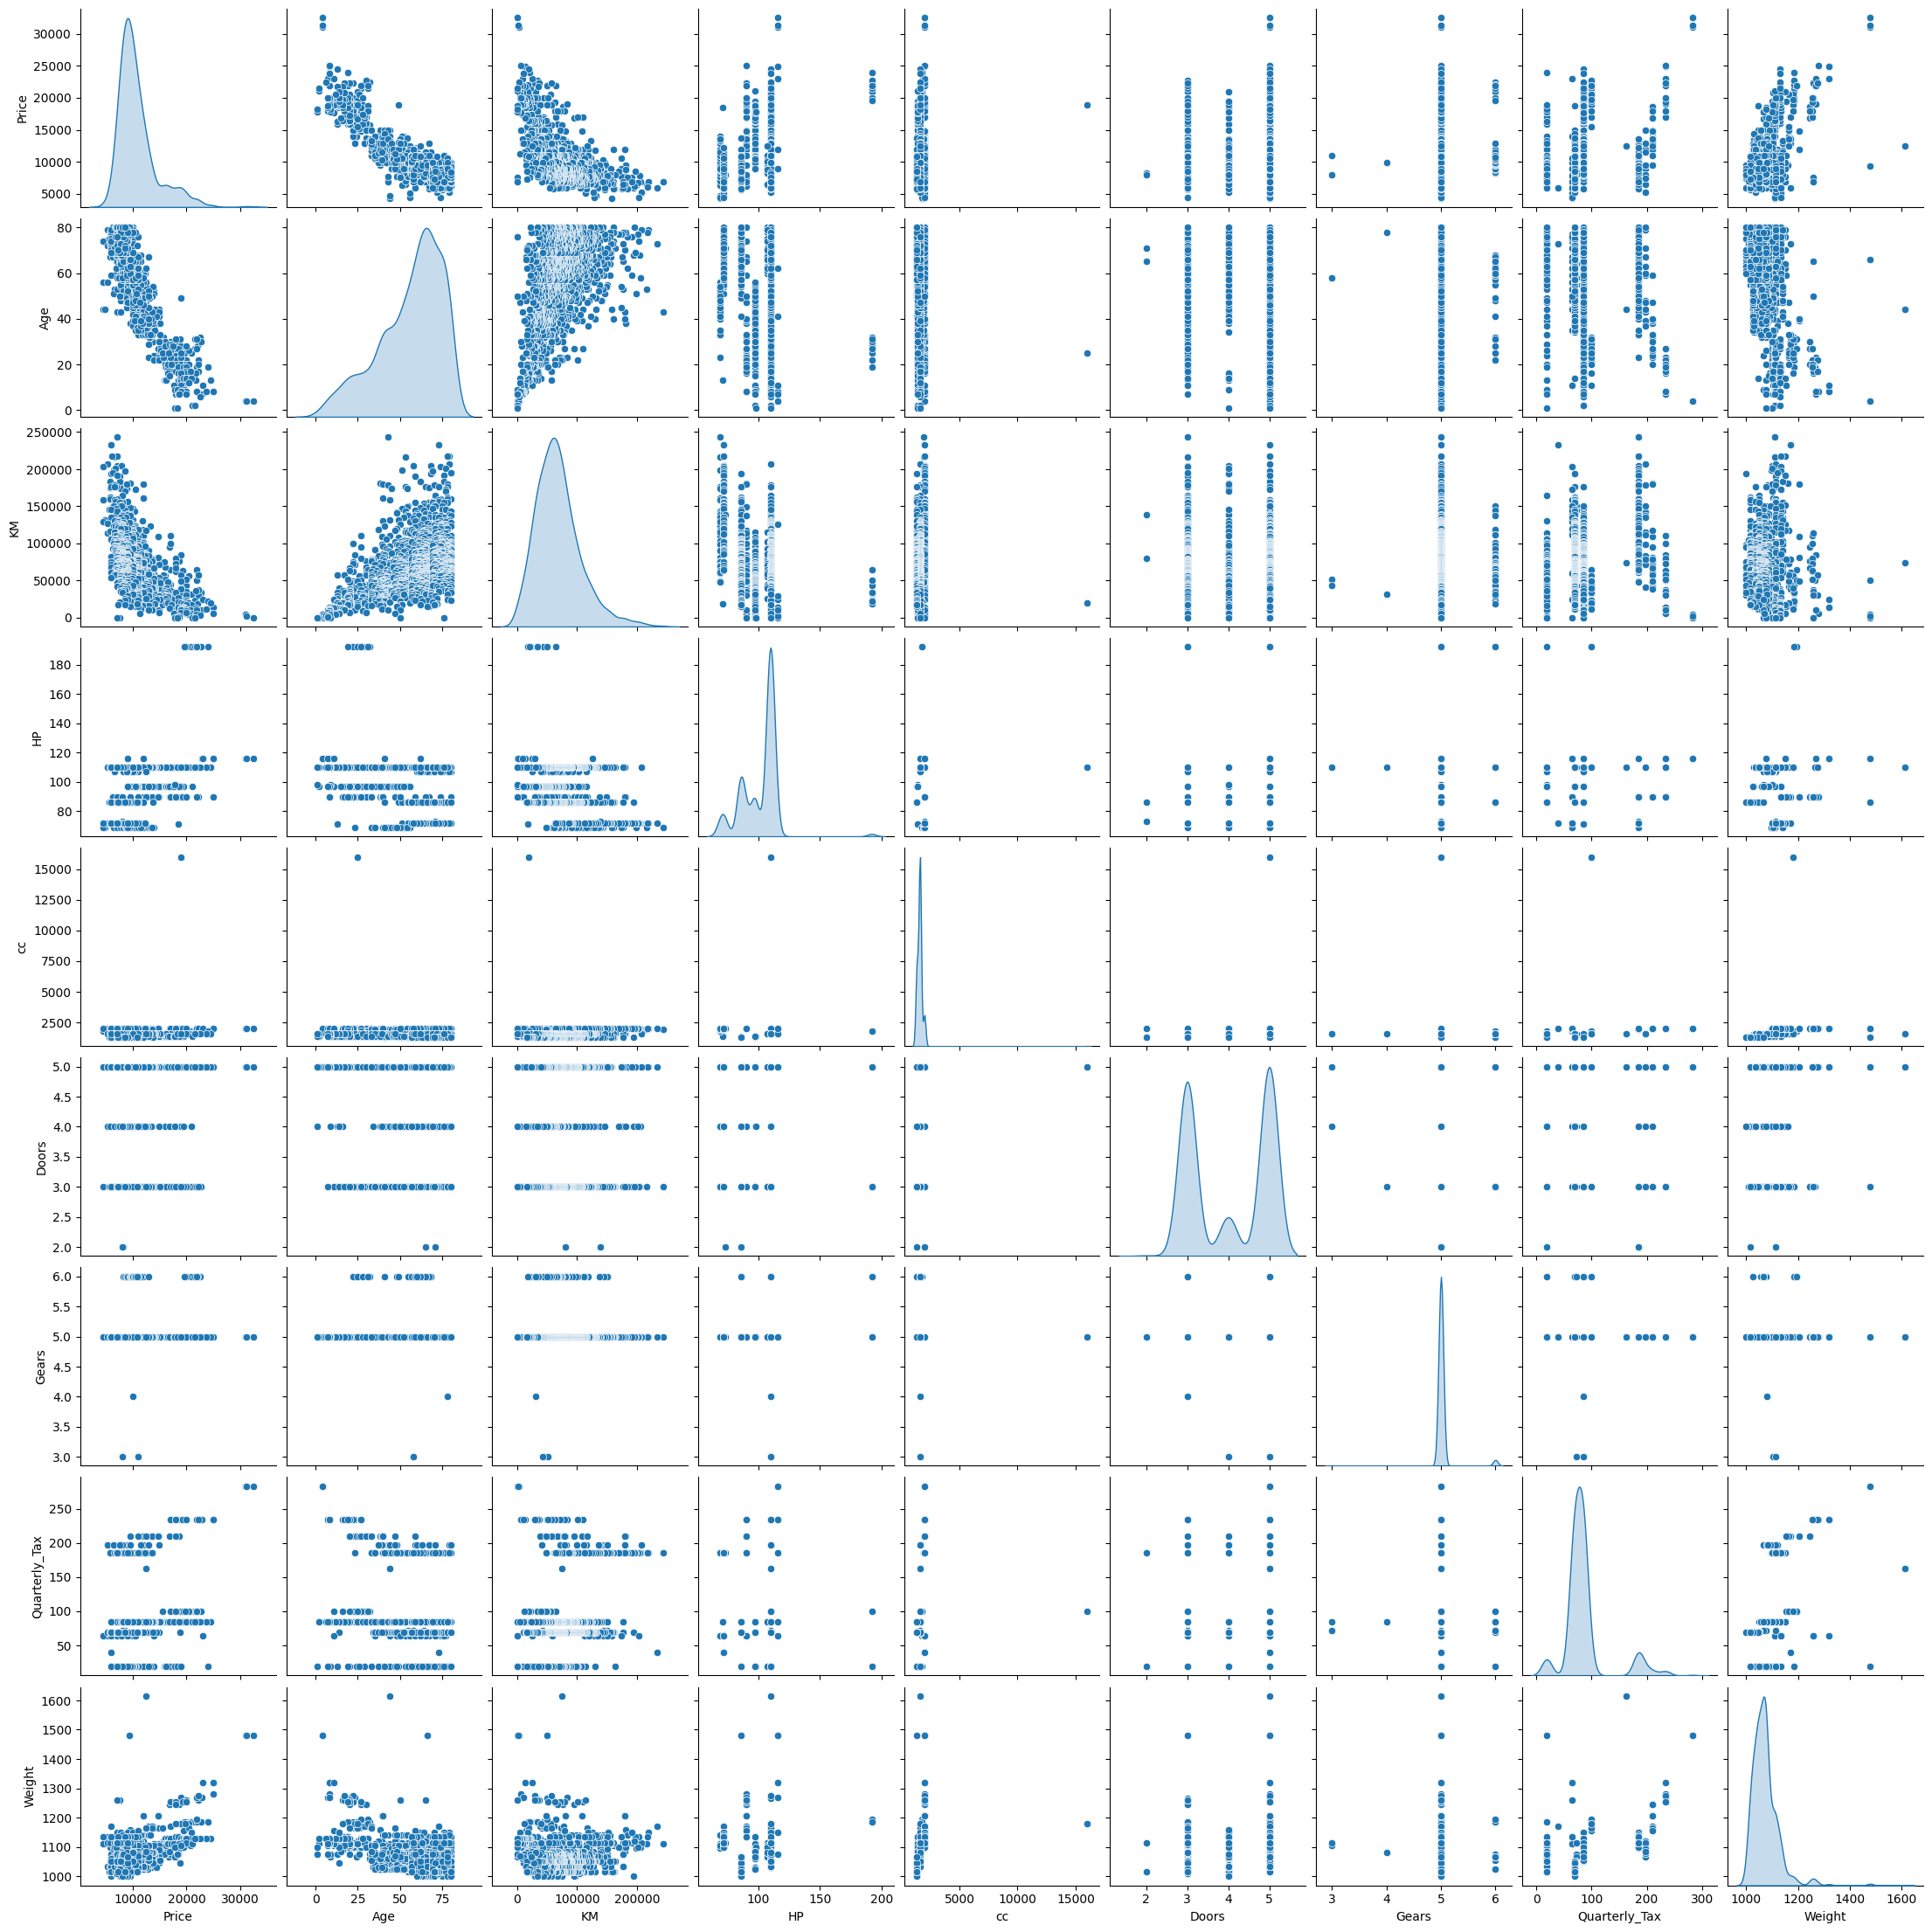

In [10]:
sns.pairplot(toyota,diag_kind="kde")

In [11]:
toyota.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<Axes: >

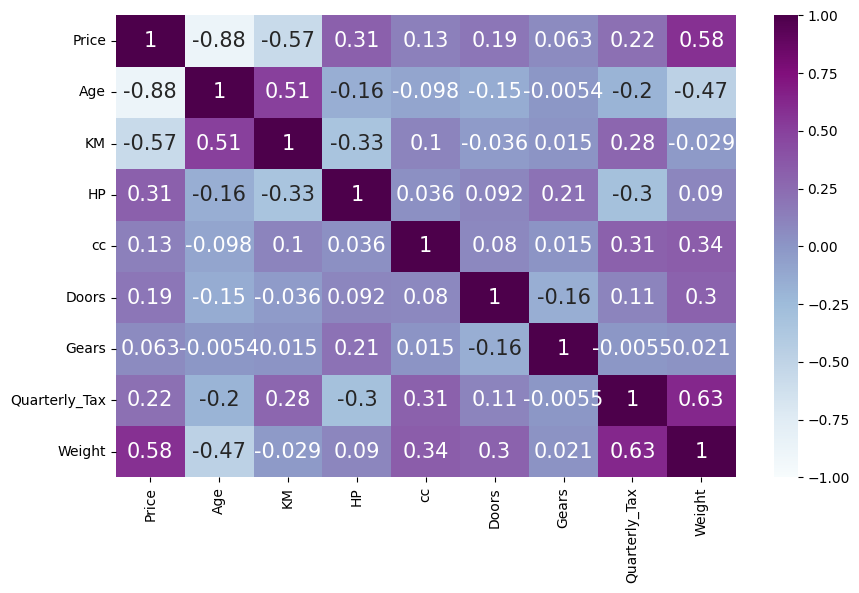

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(toyota.corr(), annot=True, vmin=-1, vmax=1, cmap='BuPu', annot_kws={'size': 15})

#there is some good correlation in between price(dependent variable) and Age, KM and weight.
# in between independent variables are also have correlation it may lead multicollinearity problem lets check further

In [13]:
#split the data
x = toyota.drop(['Price'],axis=1)
y = toyota['Price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
BaseModel = LinearRegression()
BaseModel.fit(X_train,y_train)
print("base model train score ",BaseModel.score(X_train,y_train))
print("base model test score ",BaseModel.score(X_test,y_test))

#RMSE
y_test_predict = BaseModel.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
BaseModel_RMSE = np.sqrt(mse)
BaseModel_RMSE

base model train score  0.8636809961985239
base model test score  0.8626587179727578


1382.781516901239

In [14]:
modelValidation_metrics = pd.DataFrame()
new_row = pd.Series(['BaseModel', 0.863, 0.862, 1382.781], index=['model', 'train_adjR', 'test_adjR', 'RMSE'], name=0)
modelValidation_metrics = modelValidation_metrics.append(new_row)
modelValidation_metrics

<ipython-input-14-03e91fd82c20>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modelValidation_metrics = modelValidation_metrics.append(new_row)


,model,train_adjR,test_adjR,RMSE
0,BaseModel,0.863,0.862,1382.781


#scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc= pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [16]:
scBaseModel = LinearRegression()
scBaseModel.fit(X_train_sc,y_train)
print("base model train score ",scBaseModel.score(X_train_sc,y_train))
print("base model test score ",scBaseModel.score(X_test_sc,y_test))

#RMSE
y_test_predict = scBaseModel.predict(X_test_sc)
mse = mean_squared_error(y_test, y_test_predict)
scBaseModel_RMSE = np.sqrt(mse)
scBaseModel_RMSE

base model train score  0.8636809961985239
base model test score  0.8626587179727578


1382.7815169012392

after data scaling there is no difference in scores and RMSE value as well so we can ignore this model.

As observered in heatmap in between independent variables are also having correlation so, lets check multicollinarity 

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = toyota[['Age',"KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,16.392684,Age
1,7.590522,KM
2,64.894960,HP
3,17.199750,cc
4,21.874692,Doors
5,438.631804,Gears
6,11.020074,Quarterly_Tax
7,543.133076,Weight


#As observerd weights having high vif score so lets remove weight feature.

In [18]:
x_weight = x.drop(['Weight'],axis=1)
y = toyota['Price']
X_train, X_test, y_train, y_test = train_test_split(x_weight, y, test_size=0.30, random_state=42)
Model1 = LinearRegression()
Model1.fit(X_train,y_train)
print("model train score ",Model1.score(X_train,y_train))
print("model test score ",Model1.score(X_test,y_test))

#RMSE
y_test_predict = Model1.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
Model1_RMSE = np.sqrt(mse)
Model1_RMSE

model train score  0.8390819929475295
model test score  0.8390809667638411


1496.7757031111373

In [19]:
new_row = pd.Series(['Model1', 0.839, 0.839, 1496.775], index=['model', 'train_adjR', 'test_adjR', 'RMSE'], name=1)
modelValidation_metrics = modelValidation_metrics.append(new_row)
modelValidation_metrics

<ipython-input-19-0ad4ee597968>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modelValidation_metrics = modelValidation_metrics.append(new_row)


,model,train_adjR,test_adjR,RMSE
0,BaseModel,0.863,0.862,1382.781
1,Model1,0.839,0.839,1496.775


In [20]:
#lets drop now gears
x_gears = x.drop(['Gears'],axis=1)
y = toyota['Price']
X_train, X_test, y_train, y_test = train_test_split(x_gears, y, test_size=0.30, random_state=42)
Model2 = LinearRegression()
Model2.fit(X_train,y_train)
print("model train score ",Model2.score(X_train,y_train))
print("model test score ",Model2.score(X_test,y_test))

#RMSE
y_test_predict = Model2.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
Model2_RMSE = np.sqrt(mse)
Model2_RMSE

model train score  0.8627059049967669
model test score  0.8619864215722434


1386.1617975230017

In [21]:
new_row = pd.Series(['Model2', 0.862, 0.861, 1386.161], index=['model', 'train_adjR', 'test_adjR', 'RMSE'], name=2)
modelValidation_metrics = modelValidation_metrics.append(new_row)
modelValidation_metrics

<ipython-input-21-b5063107163b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modelValidation_metrics = modelValidation_metrics.append(new_row)


,model,train_adjR,test_adjR,RMSE
0,BaseModel,0.863,0.862,1382.781
1,Model1,0.839,0.839,1496.775
2,Model2,0.862,0.861,1386.161


lets remove both and check

In [22]:
x_gearsWeight = x.drop(['Gears','Weight'],axis=1)
y = toyota['Price']
X_train, X_test, y_train, y_test = train_test_split(x_gearsWeight, y, test_size=0.30, random_state=42)
Model3 = LinearRegression()
Model3.fit(X_train,y_train)
print("model train score ",Model3.score(X_train,y_train))
print("model test score ",Model3.score(X_test,y_test))

#RMSE
y_test_predict = Model3.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
Model3_RMSE = np.sqrt(mse)
Model3_RMSE

model train score  0.8380270455234697
model test score  0.8383030655790572


1500.3891347154822

so, i guess there is multicollinearity ill effect because of correlation inbetween independent variables

#lets do residuals analysis of base model
#Test for Normality of Residuals (Q-Q Plot)

In [23]:
toyota['price_predict'] = BaseModel.predict(x)
toyota['error'] = toyota['Price']-toyota['price_predict']
toyota.head(2)

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,price_predict,error
0,13500,23,46986,90,2000,3,5,210,1165,16679.155302,-3179.155302
1,13750,23,72937,90,2000,3,5,210,1165,16153.444326,-2403.444326


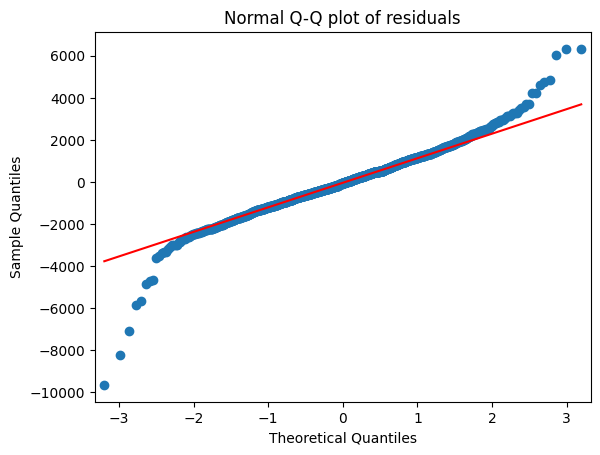

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(toyota['error'],line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

#Residual Plot for Homoscedasticity

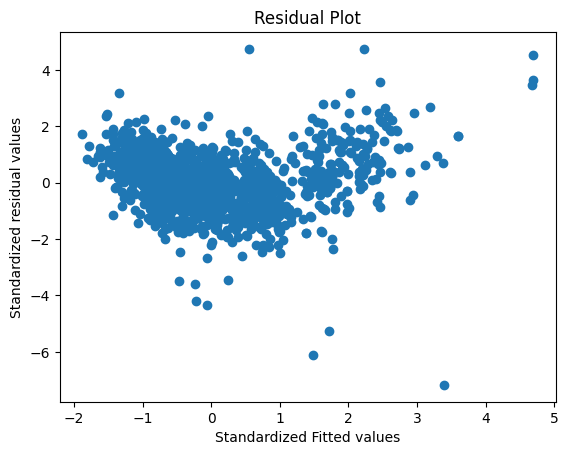

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(toyota['price_predict']),
            get_standardized_values(toyota['error']))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#Model Diagnostics
#Detecting Influencers/Outliers
#Cook’s Distance

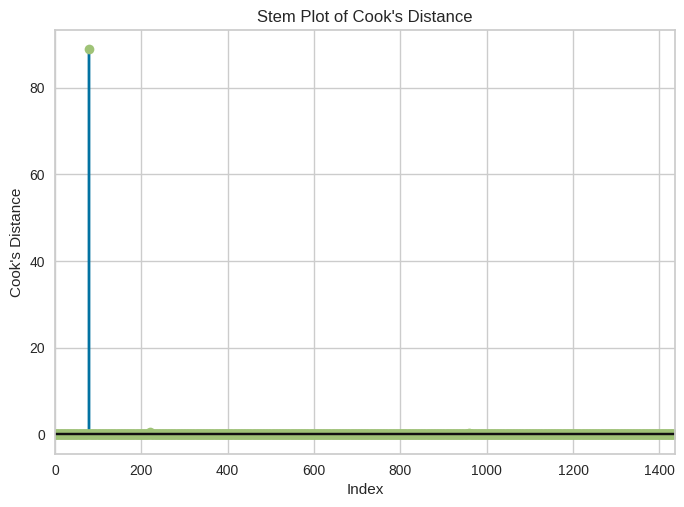

In [26]:
from yellowbrick.regressor import CooksDistance

# create a Cook's Distance plot
cd_plot = CooksDistance()
cd_plot.fit(x, y)

# create a stem plot of Cook's Distance
plt.stem(cd_plot.distance_, linefmt='C0-', markerfmt='C1o', basefmt='k-')
plt.title("Stem Plot of Cook's Distance")
plt.xlabel("Index")
plt.ylabel("Cook's Distance")
plt.show()

In [27]:
np.argmax(cd_plot.distance_)

80

In [28]:
#lets drop index 80 record
toyota_new =toyota.drop(toyota.index[[80]],axis=0).reset_index()
#Drop the original index
toyota_new = toyota_new.drop(['index'],axis=1)

In [29]:
toyota_new = toyota_new.drop(['error'],axis=1)
toyota_new = toyota_new.drop(['price_predict'],axis=1)

In [30]:
x = toyota_new.drop(['Price'],axis=1)
y = toyota_new['Price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
finalModel = LinearRegression()
finalModel.fit(X_train,y_train)
print("base model train score ",finalModel.score(X_train,y_train))
print("base model test score ",finalModel.score(X_test,y_test))

#RMSE
y_test_predict = finalModel.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
finalModel_RMSE = np.sqrt(mse)
finalModel_RMSE

base model train score  0.8749128424068846
base model test score  0.8505535967281823


1384.593069637987

In [31]:
new_row = pd.Series(['finalModel', 0.874, 0.850, 1384.593], index=['model', 'train_adjR', 'test_adjR', 'RMSE'], name=3)
modelValidation_metrics = modelValidation_metrics.append(new_row)
modelValidation_metrics

<ipython-input-31-38dbd97bc851>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modelValidation_metrics = modelValidation_metrics.append(new_row)


,model,train_adjR,test_adjR,RMSE
0,BaseModel,0.863,0.862,1382.781
1,Model1,0.839,0.839,1496.775
2,Model2,0.862,0.861,1386.161
3,finalModel,0.874,0.850,1384.593


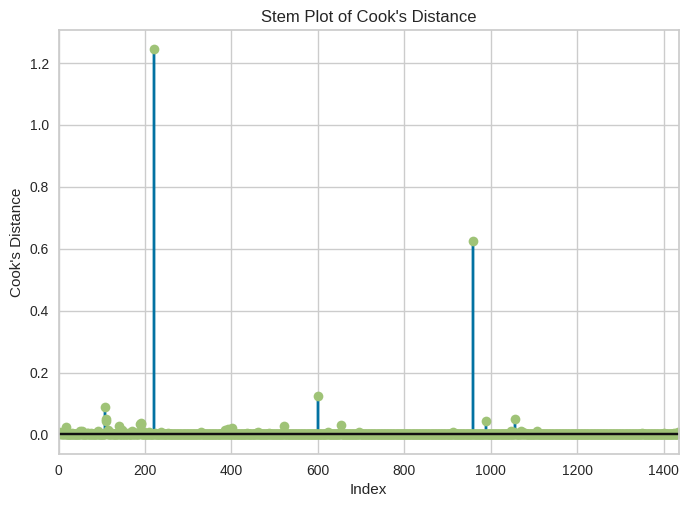

In [32]:
cd_plot = CooksDistance()
cd_plot.fit(x, y)

# create a stem plot of Cook's Distance
plt.stem(cd_plot.distance_, linefmt='C0-', markerfmt='C1o', basefmt='k-')
plt.title("Stem Plot of Cook's Distance")
plt.xlabel("Index")
plt.ylabel("Cook's Distance")
plt.show()

In [ ]:
greater_than_0_2 = cd_plot.distance_[cd_plot.distance_ >= 0.2]
greater_than_0_2

In [37]:
toyota_new2 =toyota_new.drop(toyota_new.index[[220,959]],axis=0).reset_index()

In [41]:
toyota_new2 = toyota_new2.drop(['index'],axis=1)

In [42]:
x = toyota_new2.drop(['Price'],axis=1)
y = toyota_new2['Price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
finalModel2 = LinearRegression()
finalModel2.fit(X_train,y_train)
print("final model2 train score ",finalModel2.score(X_train,y_train))
print("final model2 test score ",finalModel2.score(X_test,y_test))

#RMSE
y_test_predict = finalModel2.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
finalModel2_RMSE = np.sqrt(mse)
finalModel2_RMSE

final model2 train score  0.887997227076689
final model2 test score  0.8760973366722022


1237.5992654368451

In [43]:
new_row = pd.Series(['finalModel2', 0.887, 0.876, 1237.599], index=['model', 'train_adjR', 'test_adjR', 'RMSE'], name=4)
modelValidation_metrics = modelValidation_metrics.append(new_row)
modelValidation_metrics

<ipython-input-43-c38a0fe856a9>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modelValidation_metrics = modelValidation_metrics.append(new_row)


,model,train_adjR,test_adjR,RMSE
0,BaseModel,0.863,0.862,1382.781
1,Model1,0.839,0.839,1496.775
2,Model2,0.862,0.861,1386.161
3,finalModel,0.874,0.850,1384.593
4,finalModel2,0.887,0.876,1237.599


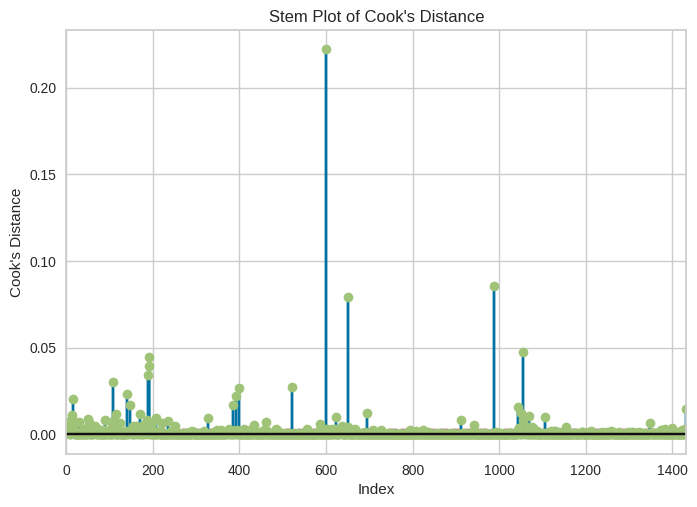

In [44]:
cd_plot = CooksDistance()
cd_plot.fit(x, y)

# create a stem plot of Cook's Distance
plt.stem(cd_plot.distance_, linefmt='C0-', markerfmt='C1o', basefmt='k-')
plt.title("Stem Plot of Cook's Distance")
plt.xlabel("Index")
plt.ylabel("Cook's Distance")
plt.show()

In [46]:
greater_than_0_1 = cd_plot.distance_[cd_plot.distance_ > 0.1]
greater_than_0_1

599    0.221959
dtype: float64

In [47]:
toyota_new3 =toyota_new2.drop(toyota_new2.index[[599]],axis=0).reset_index()
toyota_new3 = toyota_new3.drop(['index'],axis=1)

In [48]:
x = toyota_new3.drop(['Price'],axis=1)
y = toyota_new3['Price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
finalModel3 = LinearRegression()
finalModel3.fit(X_train,y_train)
print("final model3 train score ",finalModel3.score(X_train,y_train))
print("final model3 test score ",finalModel3.score(X_test,y_test))

#RMSE
y_test_predict = finalModel3.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
finalModel3_RMSE = np.sqrt(mse)
finalModel3_RMSE

final model3 train score  0.8921067229108427
final model3 test score  0.8806898871245025


1214.3384455091502

In [49]:
new_row = pd.Series(['finalModel3', 0.892, 0.880, 1214.338], index=['model', 'train_adjR', 'test_adjR', 'RMSE'], name=5)
modelValidation_metrics = modelValidation_metrics.append(new_row)
modelValidation_metrics

<ipython-input-49-27c2e34b20af>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modelValidation_metrics = modelValidation_metrics.append(new_row)


,model,train_adjR,test_adjR,RMSE
0,BaseModel,0.863,0.862,1382.781
1,Model1,0.839,0.839,1496.775
2,Model2,0.862,0.861,1386.161
3,finalModel,0.874,0.850,1384.593
4,finalModel2,0.887,0.876,1237.599
5,finalModel3,0.892,0.880,1214.338
